In [2]:
import pandas as pd

In [5]:
train = pd.read_csv("DailyDelhiClimateTrain.csv")

train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [8]:
test = pd.read_csv("DailyDelhiClimateTest.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [11]:
data = pd.concat([train, test])

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Sort by date (VERY IMPORTANT in time series)
data = data.sort_values('date')

# Reset index
data = data.reset_index(drop=True)

print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [13]:
data.shape

(1576, 5)

In [20]:

import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings("ignore")

In [22]:
data.set_index("date", inplace=True)


In [23]:
ts_data = data["meantemp"]


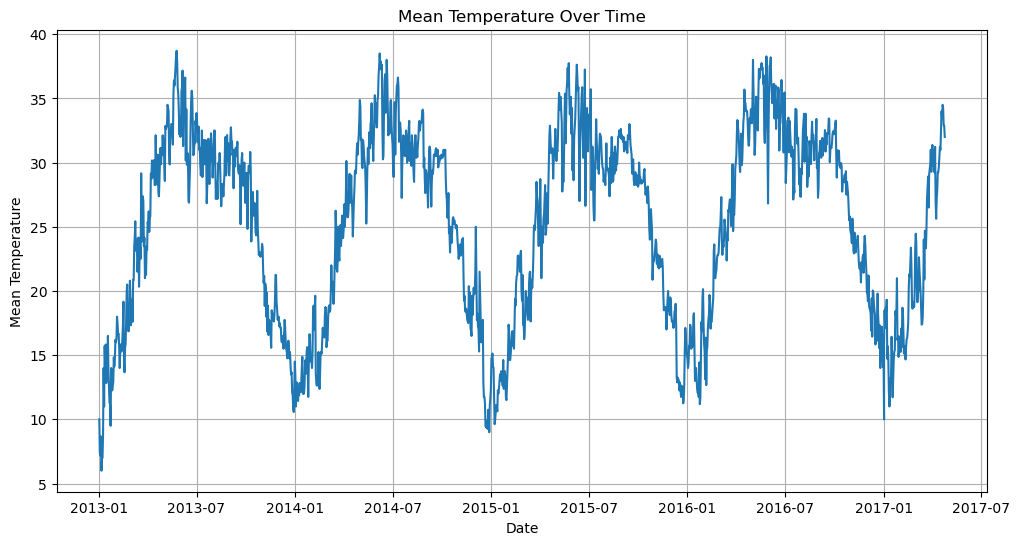

In [25]:
plt.figure(figsize=(12,6))
plt.plot(ts_data)
plt.title("Mean Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.grid(True)
plt.show()


<Figure size 1600x1000 with 0 Axes>

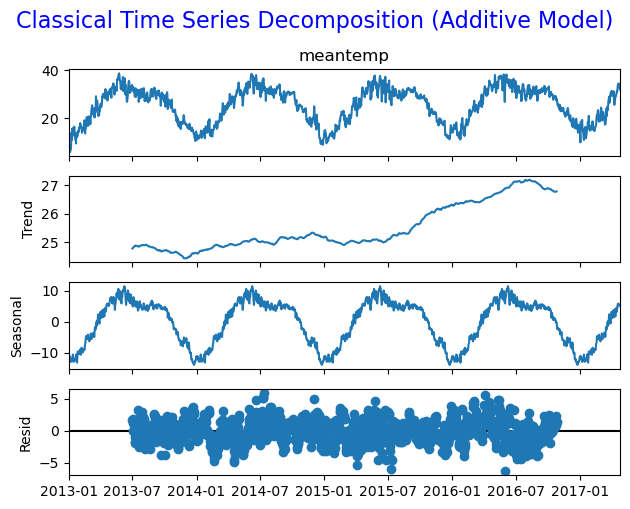

In [38]:
decomposition = seasonal_decompose(ts_data, model="additive", period=365)

plt.figure(figsize=(16,10))
decomposition.plot()
plt.suptitle("Classical Time Series Decomposition (Additive Model)", fontsize=16,y=1.05,color="blue")
plt.show()


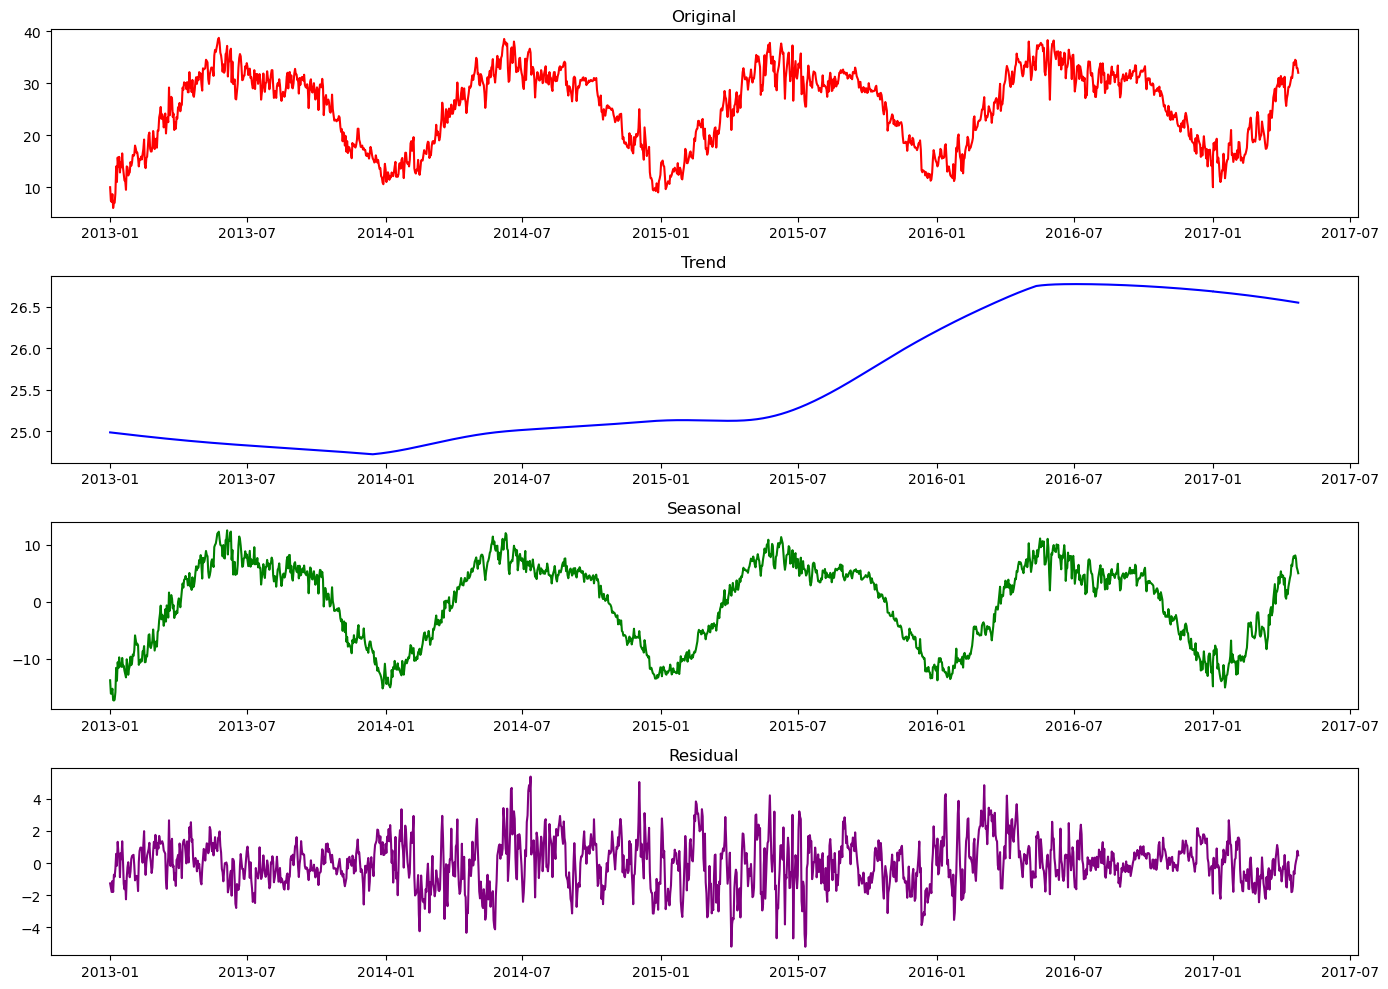

In [39]:
from statsmodels.tsa.seasonal import STL

stl = STL(ts_data, period=365)
result = stl.fit()

plt.figure(figsize=(14,10))

plt.subplot(411)
plt.plot(result.observed,color="red")
plt.title("Original")

plt.subplot(412)
plt.plot(result.trend,color="blue")
plt.title("Trend")

plt.subplot(413)
plt.plot(result.seasonal,color="green")
plt.title("Seasonal")

plt.subplot(414)
plt.plot(result.resid,color ="purple")
plt.title("Residual")

plt.tight_layout()
plt.show()


In [41]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(ts_data)

print("ADF Test Results")
print("ADF Statistic:", round(adf_test[0],3))
print("p-value:", round(adf_test[1],5))

for key, value in adf_test[4].items():
    print(key, ":", round(value,3))


ADF Test Results
ADF Statistic: -2.379
p-value: 0.1477
1% : -3.435
5% : -2.863
10% : -2.568


In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(ts_data, regression="ct")

print("KPSS Test Results")
print("KPSS Statistic:", round(kpss_test[0],3))
print("p-value:", kpss_test[1])

for key, value in kpss_test[3].items():
    print(key, ":", value)
